<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *5*: *Naive Bayes & KNN Classification***

###**Tenggat Waktu: 26 Maret 2023, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_Lab5_NPM_Nama.ipynb**. Contoh: A_Lab5_2106123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **26 Maret 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.

# **Pertanyataan Integritas**

In [ ]:
# Isi dengan data diri Anda
NAMA = "Fitri 'Aliyah"
KELAS = "B"
NPM = "2006597115"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [ ]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Fitri 'Aliyah dari kelas B dengan NPM 2006597115, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Fitri 'Aliyah)


# Naive Bayes

## A. Pengenalan Naive Bayes

Tugas Anda kali ini adalah mengimplementasi Naive Bayes Classifier dan melakukan pengukuran kinerja model. Mari kita sekilas mempelajari tentang Naive Bayes Classifier terlebih dahulu.




 Algoritma Naive Bayes memprediksi peluang di masa depan berdasarkan pengalaman di masa sebelumnya sehingga dikenal sebagai Teorema Bayes. Ciri utama dari Naive Bayes Classifier ini adalah asumsi yg sangat kuat akan independensi dari masing-masing kondisi/kejadian.

Bayangkan bahwa Anda ingin membentuk classifier yang memprediksi golongan darah seseorang (A? B? AB? atau O?) berdasarkan sifat karakter seseorang (arogan? perhatian? teliti? cerdas? sabar?). Anda akan membentuk sebuah kuesioner kepribadian dan memberikan kuesioner tersebut ke orang-orang. Kuesioner tersebut dikumpulkan untuk menghasilkan sebuah dataset. Anggaplah
bahwa Kak Lulu mengatakan kepada Anda bahwa dia adalah orang yang perhatian, cerdas, teliti, dan sabar. Bisakah Anda memanfaatkan informasi dari kuesioner yang Anda kumpulkan untuk memprediksi golongan darah Kak Lulu?.

Salah satu cara untuk memprediksi golongan darah Kak Lulu adalah dengan menggunakan teorema Naive Bayes. Jika saya ingin menghitung peluang golongan darah Kak Lulu adalah O karena diketahui Kak Lulu adalah orang yang perhatian, rumus probabilitas yang dapat digunakan adalah Bayes Rule yang ditunjukkan di bawah ini.





$$
p(O \mid \text{perhatian}) = \frac{p(\text{perhatian} \mid O)p(O)}{\sum_{O'} p(O')p(\text{perhatian} \mid O')} 
$$

Ketiga nilai tersebut bisa dihitung berdasarkan data yang dikumpulkan dari kuesioner. Umumnya, kita
tidak hanya menghitung P(O | perhatian), tetapi juga menghitung P(A | perhatian) , P(B | perhatian), dan P(AB | perhatian). Setelah kita hitung empat-empatnya, golongan darah yang peluangnya paling besar itulah yang kita
prediksi sebagai golongan darah Kak Lulu.

Namun, peneliti biasanya ingin rumus yang jumlah variabelnya sedikit mungkin. Kalau kita pikirkan lebih lanjut, penyebut dari p(O|perhatian) dibagi oleh p(perhatian). Sama halnya, p(A | perhatian), p(B | perhatian), dan P(AB | perhatian) juga dibagi dengan p(perhatian) seperti yang dapat dilihat pada rumus-rumus di bawah ini.


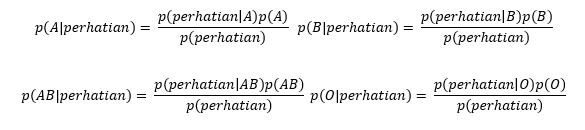

Jika keempat variabel memiliki pembagi yang sama, bukankah ini artinya urutan nilai P(A|perhatian),
P(B|perhatian) , P(AB|perhatian), dan P(O|perhatian) dari yang terbesar sampai yang terkecil tidak akan berubah meskipun penyebutnya (p(perhatian)) dicoret? Sehingga kita tidak perlu untuk menghitung nilai dari p(perhatian).

$$
p(O \mid \text{perhatian}) ∝ p(\text{perhatian}\mid O) p(O)
$$

Perhatikan rumus di atas (rumus ketika pembagian dengan P(perhatian) dihilangkan).
Nilai ini hanya menghitung probabilitas mempunyai golongan darah O bila hanya faktor bahwa Kak Lulu itu perhatian diperhitungkan. Bagaimana faktor seperti cerdas, sabar, teliti, atau sifat
seseorang lainnya? Secara matematis, kita bisa membuatnya menjadi seperti ini.


\begin{align}
p(O \mid P,T,S,C) &\propto p(O)p(P,T,S,C\mid O) 
\end{align}


Keterangan : 
*   T: teliti
*   C: cerdas
*   S: Sabar
*   P: perhatian
*   O: golongan darah O






Untungnya, dalam konteks Naive Bayes Classifier, kita dapat mengasumsikan bahwa faktor seperti
teliti, cerdas, dan sebagainya saling conditionally independent atau independensi bersyarat. Artinya, rumus di atas bisa disimplifikasi sebagai berikut:

\begin{align}
p(P,T,S,C \mid O) = p(P\mid O) p(T \mid O) p(S \mid O) p(C \mid O)
\end{align}

Dengan demikian, berlaku bahwa


\begin{align}
p(O \mid P,T,S,C) &\propto p(O) p(P,T,S,C \mid O) \\
&= p(O) p(P\mid O)  p(T \mid O) p(S \mid O) p(C \mid O)
\end{align}

## B. Pengenalan Naive Bayes Dalam Sckitlearn

Scikit-learn menyediakan beberapa variasi model naive bayes yang dapat digunakan, antara lain


| Nama Model | Nama Modul | 
| ----------- | --------- |
| Gaussian Naive Bayes | `sklearn.naive_bayes.GaussianNB` | 
| Multinomial Naive Bayes | `sklearn.naive_bayes.MultinomialNB` |
| Complement Naive Bayes | `sklearn.naive_bayes.ComplementNB` |
| Bernoulli Naive Bayes | `sklearn.naive_bayes.BernoulliNB` |
| Categorical Naive Bayes | `sklearn.naive_bayes.CategoricalNB` |

Adapun kegunaan masing-masing model antara lain:
- Gaussian Naive Bayes,
Model ini cocok digunakan untuk  data numerik yang mengikuti distribusi gausian dan kontinu. 

- Multinomial Naive Bayes,
Asumsi data yang digunakan memiliki distribusi multinomial sederhana. Distribusi multinomial menggambarkan probabilitas dari jumlah data pada sejumlah kategori sehingga model naive bayes ini cocok digunakan pada fitur yang merepresentasikan jumlah maupun laju pertambahan. Contohnya yaitu pada klasifikasi text dimana fitur-fitur yang ada berkaitan dengan frekuensi kata pada dokumen yang ingin diklasifikasikan.

- Complement,
Complement naive bayes mirip seperti multinomial naive bayes. Model ini ada karena model multinomial naive bayes tidak memiliki performa yang baik untuk dataset yang imbalanced dimana distribusi data tidak uniform. Akibatnya model tersebut data dengan mudah overfiting mengikuti data yang jumlahnya jauh lebih banyak. Model complement naive bayes ini cocok digunakan untuk dataset yang imbalanced. 
https://towardsdatascience.com/comparing-a-variety-of-naive-bayes-classification-algorithms-fc5fa298379e

- Bernoulli Naive Bayes,
Bernouli mirip seperti multinomial namun data memiliki bentuk yang diskret dan terdistribusi dalam bentuk binary misalnya pada data gender, binary hot encoding, dll. https://iq.opengenus.org/bernoulli-naive-bayes/

- Categorical Naive Bayes,
Model naive bayes untuk tipe data yang nilainya terdistribusi secara kategorikal. Jika data-data yang dimiliki bersifat kontinu maka harus ditransformasikan dalam bentuk diskret terlebih dahulu untuk menggunakan model ini. Misalnya yaitu data warna mata, ras, golongan darah, dll.
https://inblog.in/Categorical-Naive-Bayes-Classifier-implementation-in-Python-dAVqLWkf7E


Selengkapnya dapat dilihat pada dokumentais modul [sklearn.naive_bayes](https://scikit-learn.org/stable/modules/naive_bayes.html).

## C. Hand On Naive Bayes

Dataset didalam example.csv berisi tentang informasi dilakukannya operasi caesar atau tidak dari 80 ibu hamil dengan karakteristik masalah persalinan yang penting di bidang medis.

Informasi dataset:

`Age` = Umur

`Delivery No` = Status (Tepat waktu, prematur, terlambat)

`Blood of Pressure` = Tekanan Darah (rendah, normal, tinggi)

`Heart Problem` = Memiliki masalah penyakit jantung (apt, inept)

`Cesarian` = Dilakukan operasi caesar (ya, tidak)

Sumber dataset : https://www.kaggle.com/amir75/caesarean-section-classification


### Import Dataset

In [ ]:
# import library dan data
import pandas as pd
import numpy as np
caesarian = pd.read_csv("example.csv")
caesarian.head()

,Age,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,Timely,High,apt,No
1,26,Timely,Normal,apt,Yes
2,26,Premature,Normal,apt,No
3,28,Timely,High,apt,No
4,22,Timely,Normal,apt,Yes


In [ ]:
#Mencari jumlah nilai unik pada kolom yang bertipe kategorik 

for col in caesarian.select_dtypes(include=object).columns:
    print('No. of unique values in column '+col+':')
    print(caesarian[col].value_counts(),'\n')

No. of unique values in column Delivery No:
Timely       46
Premature    17
Latecomer    17
Name: Delivery No, dtype: int64 

No. of unique values in column Blood of Pressure:
Normal    40
High      20
Low       20
Name: Blood of Pressure, dtype: int64 

No. of unique values in column Heart Problem:
apt      50
inept    30
Name: Heart Problem, dtype: int64 

No. of unique values in column Caesarian:
Yes    46
No     34
Name: Caesarian, dtype: int64 



### Independent Variable dan Dependent Variable

Pada langkah ini, kita akan menentukan variabel yang menjadi variabel independen dan dependen. Variabel dependen akan menjadi target sedangkan variabel independen akan menjadi fitur. Variabel caesarian menjadi variabel dependen dan variabel lainnya menjadi variabel independen. 

Karena data yang diberikan bertipe kategorik, maka kita perlu melakukan transformasi supaya data dapat diolah oleh mesin. Ada beberapa teknik transformasi yang dapat dilakukan, diantaranya : <br>
* One hot encoding
* Label encoding (Natural Progression)
* Vector encoding
* etc


Teknik-teknik, memiliki kelebihan dan kelemahannya masing-masing (teman-teman mungkin bisa membacanya di internet terkait kelebihan dan kekurangan ketiga teknik tersebut). Pada sesi tutorial ini, kita akan menggunakan teknik one hot encoding. <br><br>
Referensi apa itu one-hot encoding : <br>
https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

In [ ]:
# Proses Encoding menggunakan One-Hot encoding

df_dummy = pd.get_dummies(caesarian,drop_first=True)
df_dummy.head()

,Age,Delivery No_Premature,Delivery No_Timely,Blood of Pressure_Low,Blood of Pressure_Normal,Heart Problem_inept,Caesarian_Yes
0,22,0,1,0,0,0,0
1,26,0,1,0,1,0,1
2,26,1,0,0,1,0,0
3,28,0,1,0,0,0,0
4,22,0,1,0,1,0,1


<b><i> Pemicu : </i></b><br>
Kenapa kita buang fitur pertama dari setiap kolom setelah kita melakukan one-hot encoding? Jika teman-teman baca kembali pada penjelasan naive bayes, naive bayes memegang asumsi yang kuat <b>bahwa</b> setiap fitur independen satu sama lain. Setelah kita melakukan transformasi one hot encoding, akan terjadi korelasi yang sangat tinggi pada dataset kita. Semisal, setelah kita encoding variable gender, terbentuk fitur <b>is_male</b> dan juga <b>is_female</b>. Kedua fitur ini akan saling berkorelasi satu sama lain dengan sangat kuat yang dapat membuat proses training untuk beberapa algoritma menjadi berantakan. N-1 fitur saja sudah cukup, karena sudah dapat menampung semua informasi yang ada.  

In [ ]:
# Variabel independen
x = df_dummy.drop(["Caesarian_Yes"], axis = 1)
x.head()

,Age,Delivery No_Premature,Delivery No_Timely,Blood of Pressure_Low,Blood of Pressure_Normal,Heart Problem_inept
0,22,0,1,0,0,0
1,26,0,1,0,1,0
2,26,1,0,0,1,0
3,28,0,1,0,0,0
4,22,0,1,0,1,0


In [ ]:
# Variabel dependen
y = df_dummy["Caesarian_Yes"]
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Caesarian_Yes, dtype: uint8

### Classification
Klasifikasi menggunakan naive bayes terdapat dalam package sklearn. Dalam pengklasifikasian ini dibutuhkan data testing dan data training. Kita akan mengambil 20% dari data yang ada sebagai test.  Berikut adalah kode program untuk menentukan data testing dan data training.

In [ ]:
# Melakukan splitting terhadap data train dan test (0.2 test_size)

from sklearn.model_selection import train_test_split, KFold, cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y,random_state = 123)

Kemudian kita akan melakukan cross validation dengan number_split = 5. Cross Validation digunakan untuk membagi dataset menjadi beberapa bagian (*fold*). Strategi ini dapat Anda gunakan untuk dapat menghasilkan model yang lebih stabil performance-nya serta dapat juga digunakan untuk menghindari overfitting data.

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

Setelah itu kita akan mengaktifkan/memanggil/membuat fungsi klasifikasi naive bayes, mengevaluasi hasil kfold, dan memasukkan data training pada fungsi klasifikasi gaussian naive bayes.

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()


In [ ]:
scores = cross_val_score(modelnb, x_train, y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation:{scores.mean()}')

Hasil Evaluasi cross validation:0.6230769230769231


In [ ]:
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
modelnb.fit(x_train, y_train)

GaussianNB()

Langkah selanjutnya yang akan kita lakukan adalah menentukan hasil prediksi dari x_test.

In [ ]:
# Prediksi data test
y_pred = modelnb.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=uint8)

Output kode program y_pred adalah hasil prediksi operasi caesar. Kemudian, hasil tersebut akan kita bandingkan dengan data aktualnya, yaitu y_test dengan menggunakan kode program berikut ini.

In [ ]:
# Array data test
np.array(y_test)

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0], dtype=uint8)

### Classification Report

Setelah model kita training dan kita testing, kita akan mengevaluasi sebagus apa si model yang telah kita bangun tersebut. Ada beberapa nilai yang perlu kita perhatikan disini, yaitu accuracy, f1-score, recall, dan precision. Kita juga akan menampilkan confusion matrix untuk melihat ketepatan prediksi dengan lebih detail. Melalui report ini, kita dapat menentukan apakah model kita sudah optimal atau belum.

In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score


def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [ ]:
evaluate_classifier_performance(y_pred,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.64      0.78      0.70         9

    accuracy                           0.62        16
   macro avg       0.62      0.60      0.60        16
weighted avg       0.62      0.62      0.61        16



Confusion Matrix



prediction,0,1
actual,,
0,3,4
1,2,7




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.625
F1 Macro Average: 0.6000000000000001
F1 Micro Average: 0.625
Precision Macro Average: 0.6181818181818182
Precision Micro Average: 0.625
Recall Macro Average: 0.6031746031746031
Recall Micro Average: 0.625



Berdasarkan report diatas, kita dapat melihat bahwa model kita ternyata tidak terlalu baik (<b>OH TIDAK!</b>). Terlihat dari accuracy yang tidak terlalu bagus, begitu juga dengan nilai-nilai yang lainnya. Ada beberapa kemungkinan penyebab, berikut adalah detailnya, <br>
* Dataset yang tidak balance <br>
Perbandingan jumlah tiap class yang di-train tidak seimbang, yang menyebabkan proses training menjadi bias dan terlalu condong pada class dengan jumlah yang lebih banyak <br>
* Pemilihan algoritma naive bayes yang kurang sesuai <br>
Algoritma yang digunakan tidak sesuai dengan sifat data kita, sehingga menghasilkan model yang tidak optimal. Beberapa algoritma hanya cocok untuk distribusi tertentu saja.
* Data Preprocessing yang tidak optimal <br>

# KNN (K-Nearest Neighbors)

## A. Pengenalan KNN

Sesuai dengan namanya (<i>nearest neighbors</i>), algoritma ini mengklasifikasikan suatu data baru dengan melihat kedekatan data tersebut terhadap data lama yang lainnya. Contoh, kamu mempunyai dataset yang berisi informasi rumah dengan label rumah mewah dan rumah tidak mewah. KNN akan menyimpan informasi mengenai ukuran yang serupa, seperti kemiripan luas rumah dan juga harga rumah. Ketika data rumah baru masuk, KNN akan mengecek kesamaan informasi data rumah tersebut terhadap data lama yang telah dipelajari KNN. Hasil pengecekan akan dijadikan sebagai kesimpulan rumah baru tersebut masuk ke dalam klasifikasi yang mana.

Apa saja yang perlu kita perhatikan sebelum mengimplementasikan KNN?
* <b>Jumlah K</b> <br>
Jumlah K sangat menentukan performa KNN. K merepresentasikan jumlah data point terdekat, yang akan digunakan untuk menentukan suatu data point masuk ke dalam kategori apa. K yang kecil sangat rentan dengan <i>noise</i> yang dapat membuat model overfitting, sedangkan K yang besar dapat merusak aspek <i>lokalitas</i> yang berujung ke penurunan performa model klasifikasi.<br>


* <b>Rumus Jarak yang digunakan</b> <br>
Rumus jarak yang digunakan untuk menghitung kedekatan data point terhadap data yang lainnya juga sangat menentukan performa dari algoritma KNN. Jika perhitungan jarak yang digunakan kurang sesuai, maka kalkulasi similarity akan tidak tepat dan berujung membuat klasifikasi menjadi tidak sesuai

## B. Pengenakan KNN Pada Scikit-Learn

Referensi : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Pada scikit-learn, ada beberapa parameter yang perlu kita perhatikan, berikut adalah rangkuman singkatnya.

* n_neighbor <br>
n_neighbor merepresentasikan jumlah K yang kita gunakan, dengan default nilai adalah 5 <br>
* algorithm <br>
parameter algorithm merepresentasikan algoritma yang digunakan dalam mencari tetangga terdekat. Algoritma yang tersedia adalah, ball tree, kd tree, brute force, dan auto. Default nilai dari parameter ini adalah auto <br>
* p (int) <br>
parameter ini merepresentasikan parameter yang digunakan untuk metric. Jika menggunakan minkowski, maka p bernilai 1 digunakan untuk manhattan distance dan p bernilai 2 untuk euclidean distance. Default dari parameter ini adalah 2, yaitu euclidean distance <br>
* metric <br>
parameter ini digunakan untuk menentukan rumus jarak yang dipakai. Default dari nilai ini adalah minkowski. <br>

Kita perlu memperhatikan rumus jarak yang digunakan dan juga jumlah K yang optimal. Strategi yang dapat diterapkan untuk mencari nilai k yang optimal adalah dengan <b> cross validation </b> sedangkan untuk metric beserta parameternya bisa dipilih berdasarkan sifat data (jika semua numerik mungkin kita bisa memilih untuk menggunakan euclidean atau manhattan, dan jika semua kategorik bisa menggunakan jacard distance). Permasalahan yang selalu ditemukan saat mengimplementasikan KNN adalah, ketika independent variable yang ada terdiri dari data <b>kategorik</b> dan <b>numerik</b>. Banyak praktisi yang meyakini untuk menggunakan algoritma lain jika menemui masalah tersebut, seperti menggunakan algoritma decision tree, random forest, neural network, deep learning, dan lain-lain.

Dokumentasi mengenai terkait rumus jarak apa saja yang dapat digunakan, dapat diakses disini : <br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics

## C. Hand On KNN

Kita akan coba mengimplementasikan KNN untuk mengklasifikasikan obat yang harus dikonsumsi oleh seorang pasien dengan menggunakan dataset `drug.csv`

Berikut adalah informasi dataset :

`Age` : Age of the Patient

`Sex` : Gender of the patients

`BP` : Blood Pressure Levels

`Cholestrol` : Cholestrol Levels

`Na_to_K` : Sodium to potassium Ration in

`Drug` : Drug Type

### Import Dataset

In [ ]:
drug = pd.read_csv('drug.csv')
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
print("----Informasi Baris dan Kolom----")
print("Baris : ", drug.shape[0])
print("Kolom : ", drug.shape[1])

----Informasi Baris dan Kolom----
Baris :  200
Kolom :  6


In [ ]:
drug.describe(include=object)

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,DrugY
freq,104,77,103,91


Diatas adalah deskripsi khusus untuk data bertipe kategorik

In [ ]:
drug.describe(include='number')

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


Diatas adalah deskripsi data khusus untuk yang bertipe angka

### Preprocessing

In [ ]:
# mengecek nilai null
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    
    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
        
    else:
        print(missing_data[missing_data['Total'] > 0])

In [ ]:
cek_null(drug)

Tidak ditemukan missing value pada dataset


In [ ]:
drug.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [ ]:
# jumlah duplikat pada data
print("Jumlah duplikasi data : " + str(drug.duplicated().sum()))

Jumlah duplikasi data : 0


<Axes: >

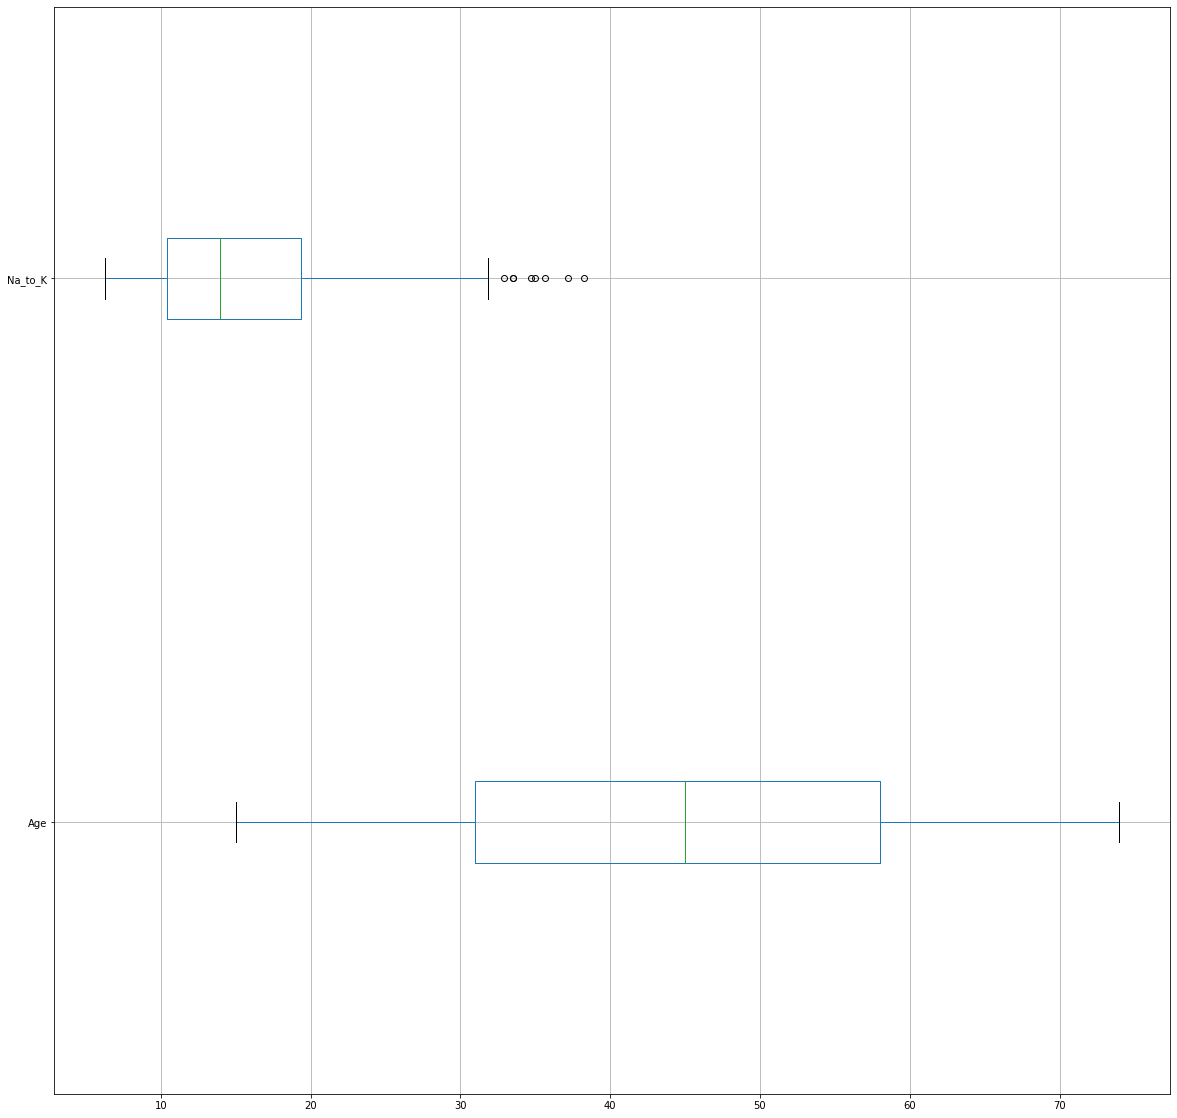

In [ ]:
# mengecek keberadaan outlier
drug.boxplot(vert=False,figsize=(20,20))

Pada boxplot diatas, terlihat bahwa jumlah outlier tidak terlalu banyak. Data juga cenderung normal, sehingga tidak perlu lagi penanganan terhadap outlier.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
cleanData = drug.copy()

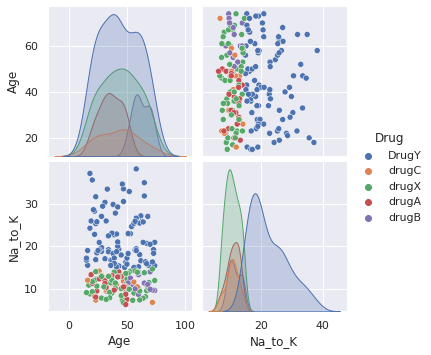

In [ ]:
# menampilkan plot data yang sudah bersih
sns.pairplot(cleanData,hue ='Drug')

Berdasarkan plot diatas, terlihat bahwa distribusi nilai pada semua jenis obat hampir mendekati normal. Walaupun ada beberapa yang terlihat seperti bimodal, masih tetap bisa ditoleransi.

### Menentukan dependent variable dan independent variables

Karena target prediksi kita disini adalah <b>Drug</b>, maka variable species akan menjadi variable dependent dan variable yang lainnya akan menjadi variable independent.

Sebelum menentukan independent variables atau features yang akan kita gunakan pada model, kita akan melakukan feature selection terlebih dahulu untuk memilih variable-variable terbaik. Karena data <b>feature</b> kita bersifat numerik atau kontinuos, dan data target kita kategorik, maka kita akan memilih strategi <b> ANOVA </b> atau analysis of variance dalam melakukan feature selection. Berikut adalah contohnya. 

Referensi : <br>
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In [ ]:
# encode target terlebih dahulu menjadi numerik dengan natural progression (label encoder)

# menggunakan label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cleanData['Sex'] = le.fit_transform(cleanData['Sex'])
cleanData['BP'] = le.fit_transform(cleanData['BP'])
cleanData['Cholesterol'] = le.fit_transform(cleanData['Cholesterol'])
cleanData.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY


In [ ]:
X_raw = cleanData.drop(["Drug"],axis=1)
y = cleanData["Drug"]

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

Kita akan memilih 2 variable terbaik dari independent variable kita untuk dilatih pada model. Berikut adalah contoh code-nya.

In [ ]:
selector = SelectKBest(f_classif, k=2) # kita akan memilih 2 variable terbaik dari features kita
X = selector.fit_transform(X_raw, y)

<i> Note </i> : <br>
Perhatikan, pemilihan feature harus dilakukan secara terus menerus atau berulang dengan memperbaiki tahap sebelumnya. Jika teman-teman ingin mendapatkan model terbaik, teman-teman harus terus melakukan tahapan ini hingga teman-teman mendapatkan model yang terbaik.

In [ ]:
print("Jumlah feature (sebelum dilakukan feature selection ) :", X_raw.shape[1])
print("Jumlah feature (setelah dilakukan feature selection ) :", X.shape[1])

Jumlah feature (sebelum dilakukan feature selection ) : 5
Jumlah feature (setelah dilakukan feature selection ) : 2


In [ ]:
input_features = selector.feature_names_in_
selector.get_feature_names_out(input_features=input_features)

array(['BP', 'Na_to_K'], dtype=object)

Diatas adalah detail feature apa saja yang kita ambil.

Selanjutnya, kita akan membagi dataset menjadi testing dan training dengan ukuran yang sama pada proses Naive Bayes. Berikut adalah caranya.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y,random_state = 123)

### Standarization

Sebelum melakukan KNN, kita perlu standarisasi nilai independent variables kita. Hal ini <b>cukup penting</b> dilakukan dalam KNN, karena range nilai yang berbeda-beda dapat mengganggu perhitungan jarak ketika algoritma dijalankan. 

Pada tahapan ini, kita akan memilih menggunakan min max scaler saja, berikut adalah caranya.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train) # training
X_test_scaled = scaler.transform(X_test) # testing

### Melatih Model

Teman-teman dapat memilih rumus perhitungan jarak yang ingin digunakan dengan menambahkan parameter `metric` pada saat pembuatan model KNN. By default, jika tidak ditambahkan, nilai parameter tersebut adalah minkowski.

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#### KNN dengan Euclidean Distance

In [ ]:
# import KNN
from sklearn.neighbors import KNeighborsClassifier

KNN_euclidean = KNeighborsClassifier(n_neighbors=2, metric='euclidean') # kita akan menggunakan nilai 2 untuk k terlebih dahulu


In [ ]:
scores = cross_val_score(KNN_euclidean, X_train_scaled, y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.8125


In [ ]:
KNN_euclidean.fit(X_train_scaled,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [ ]:
y_pred = KNN_euclidean.predict(X_test_scaled)
y_pred

array(['DrugY', 'drugB', 'drugX', 'DrugY', 'DrugY', 'drugX', 'drugB',
       'drugX', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugC',
       'drugC', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'drugX',
       'drugX', 'drugA', 'DrugY', 'drugA', 'drugX', 'drugX', 'DrugY',
       'drugA', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugX', 'drugA',
       'drugB', 'drugA', 'DrugY', 'DrugY', 'drugX'], dtype=object)

In [ ]:
evaluate_classifier_performance(y_pred,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

       DrugY       0.95      1.00      0.97        18
       drugA       0.40      0.40      0.40         5
       drugB       0.00      0.00      0.00         3
       drugC       1.00      0.67      0.80         3
       drugX       0.91      0.91      0.91        11

    accuracy                           0.80        40
   macro avg       0.65      0.60      0.62        40
weighted avg       0.80      0.80      0.80        40



Confusion Matrix



prediction,DrugY,drugA,drugB,drugC,drugX
actual,,,,,
DrugY,18,0,0,0,0
drugA,0,2,3,0,0
drugB,0,3,0,0,0
drugC,0,0,0,2,1
drugX,1,0,0,0,10




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.8
F1 Macro Average: 0.6164127764127765
F1 Micro Average: 0.8000000000000002
Precision Macro Average: 0.6512918660287081
Precision Micro Average: 0.8
Recall Macro Average: 0.5951515151515151
Recall Micro Average: 0.8



#### KNN Dengan Manhattan Distance

In [ ]:
KNN_manhattan = KNeighborsClassifier(n_neighbors=2, metric='manhattan') # kita akan menggunakan nilai 2 untuk k terlebih dahulu
KNN_manhattan.fit(X_train_scaled,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=2)

In [ ]:
scores = cross_val_score(KNN_manhattan, X_train_scaled, y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.8125


In [ ]:
y_pred = KNN_manhattan.predict(X_test_scaled)
y_pred

array(['DrugY', 'drugB', 'drugX', 'DrugY', 'DrugY', 'drugX', 'drugB',
       'drugX', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugC',
       'drugC', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'drugX',
       'drugX', 'drugA', 'DrugY', 'drugA', 'drugX', 'drugX', 'DrugY',
       'drugA', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugX', 'drugA',
       'drugB', 'drugA', 'DrugY', 'DrugY', 'drugX'], dtype=object)

In [ ]:
evaluate_classifier_performance(y_pred,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

       DrugY       0.95      1.00      0.97        18
       drugA       0.40      0.40      0.40         5
       drugB       0.00      0.00      0.00         3
       drugC       1.00      0.67      0.80         3
       drugX       0.91      0.91      0.91        11

    accuracy                           0.80        40
   macro avg       0.65      0.60      0.62        40
weighted avg       0.80      0.80      0.80        40



Confusion Matrix



prediction,DrugY,drugA,drugB,drugC,drugX
actual,,,,,
DrugY,18,0,0,0,0
drugA,0,2,3,0,0
drugB,0,3,0,0,0
drugC,0,0,0,2,1
drugX,1,0,0,0,10




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.8
F1 Macro Average: 0.6164127764127765
F1 Micro Average: 0.8000000000000002
Precision Macro Average: 0.6512918660287081
Precision Micro Average: 0.8
Recall Macro Average: 0.5951515151515151
Recall Micro Average: 0.8



#### KNN dengan Jaccard Distance

In [ ]:
KNN_jaccard = KNeighborsClassifier(n_neighbors=2, metric='jaccard') # kita akan menggunakan nilai 2 untuk k terlebih dahulu
KNN_jaccard.fit(X_train_scaled,y_train)


KNeighborsClassifier(metric='jaccard', n_neighbors=2)

In [ ]:
scores = cross_val_score(KNN_jaccard, X_train_scaled, y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.24375


In [ ]:
y_pred = KNN_jaccard.predict(X_test_scaled)
y_pred

array(['drugA', 'drugA', 'drugX', 'drugA', 'drugA', 'drugX', 'drugA',
       'drugX', 'drugA', 'drugX', 'drugX', 'drugX', 'drugX', 'drugX',
       'drugX', 'drugX', 'drugX', 'drugA', 'drugX', 'drugX', 'drugX',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'drugX', 'drugX',
       'drugA', 'drugA', 'drugA', 'drugA', 'drugX', 'drugX', 'drugA',
       'drugA', 'drugA', 'drugA', 'drugX', 'drugX'], dtype=object)

In [ ]:
evaluate_classifier_performance(y_pred,y_test)


Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

       DrugY       0.00      0.00      0.00        18
       drugA       0.29      1.00      0.45         5
       drugB       0.00      0.00      0.00         3
       drugC       0.00      0.00      0.00         3
       drugX       0.48      1.00      0.65        11

    accuracy                           0.40        40
   macro avg       0.15      0.40      0.22        40
weighted avg       0.17      0.40      0.23        40



Confusion Matrix



prediction,drugA,drugX
actual,,
DrugY,9,9
drugA,5,0
drugB,3,0
drugC,0,3
drugX,0,11




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.4
F1 Macro Average: 0.22032085561497325
F1 Micro Average: 0.4000000000000001
Precision Macro Average: 0.15447570332480817
Precision Micro Average: 0.4
Recall Macro Average: 0.4
Recall Micro Average: 0.4



Berdasarkan hasil evaluasi beberapa model diatas, terlihat bahwa jika menggunakan metric evaluasi manhattan dan euclidean, untuk nilai k=2, nilai akurasi model kita sudah cukup baik. Selain itu, nilai F1 baik macro dan micro juga terlihat sudah cukup baik. Model jauh dari kemungkinan terjadi false positive dan juga false negative. Akan tetapi, terlihat pula bahwa model menghasilkan hasil evaluasi yang kurang baik saat menggunakan metric distance Jaccard. Hal tersebut karena Jaccard biasa digunakan untuk menghitung similarity atau dissimilarity di antara fitur-fitur binary/categorical. Oleh karena semua fitur kita sudah dalam bentuk numerik, maka Jaccard kurang baik dalam melakukan perhitungan jarak atribut-atribut tersebut sehingga berdampak pada kinerja model yang dihasilkan menjadi kurang baik pula.

Note: Meskipun dengan nilai k=2, model KNN dengan euclidean dan manhattan distance sudah cukup baik, tetapi nilai K tersebut bisa saja bukanlah K yang paling baik untuk model tersebut. Perlu dilakukan analisis dan eksplorasi lebih lanjut untuk menentukan nilai K terbaik yang dapat meningkatkan performa model tersebut.

### Hyperparameter Tuning

Seperti yang sudah dikatakan sebelumnya, dalam memilih nilai K yang terbaik kita perlu melakukan cross validation. Kita akan melakukan hal ini dengan hyperparameter tuning menggunakan bantuan grid search cv. Scoring yang akan kita gunakan pada fase tuning adalah accuracy, artinya adalah kita akan mengambil parameter terbaik yang memberikan nilai akurasi terbaik. Berikut adalah contohnya.

In [ ]:
# Optimalisasi KNN dengan gridsearch CV

# import Grid Search CV
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()

# parameter yang akan di tunning
tunned_params = [
  { 
    'n_neighbors': [1,2,3,4,5,6,7,8]
  } 
]

print("##### Tuning hyper-parameters model KNN #####")
print()

clfKNN = GridSearchCV(model, 
                    tunned_params,
                     scoring="accuracy",
                    cv=kfold,
                   verbose = 2
                    )

clfKNN.fit(X_train_scaled, y_train)

print("Best parameters set found on development set:")
print()
print(clfKNN.best_params_)
print()
print("Detailed classification report:")
print()
y_true, y_pred = y_test, clfKNN.predict(X_test_scaled)
evaluate_classifier_performance(y_pred, y_true)
print()

##### Tuning hyper-parameters model KNN #####

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[C

prediction,DrugY,drugA,drugB,drugC,drugX
actual,,,,,
DrugY,18,0,0,0,0
drugA,0,2,3,0,0
drugB,0,0,3,0,0
drugC,0,0,0,1,2
drugX,1,0,0,0,10




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.85
F1 Macro Average: 0.7161266856919031
F1 Micro Average: 0.85
Precision Macro Average: 0.856140350877193
Precision Micro Average: 0.85
Recall Macro Average: 0.7284848484848485
Recall Micro Average: 0.85




Berdasarkan hasil diatas, kita peroleh bahwa nilai k yang paling optimal adalah 3.

Hyperparameter tuning untuk KNN tidak terbatas hanya untuk nilai k saja ya teman-teman. Kalian bisa menggunakan ini untuk menemukan nilai p terbaik atau metric terbaik yang digunakan pada model. Namun, tentunya kompleksitas tuning akan meningkat dan kalian pasti akan semakin lama menunggunya kelar :D

Berdasarkan hasil diatas, model yang kita peroleh sudah optimal karena nilai akurasi yang hampir mendekati 1. Nilai F1 Micro dan Accuracy kita juga sudah diatas 80%, hal ini menandakan bahwa model kita memiliki nilai false positive dan false negative yang rendah.  

# Latihan Soal

Setelah mempelajari apa itu KNN dan Naive bayes beserta penerapannya pada scikit learn, mari kita latihan :D

## A. Pertanyaan Teoritis (Soal Pertama) [15]

### A. Soal Teoritis 1 [5]

Pada tahap *hands on Naive Bayes* sebelumnya, terlihat bahwa hasil evaluasi model masih kurang baik. Salah satu kemungkinan penyebabnya adalah pemilihan algoritma naive bayes yang kurang sesuai. Silakan lakukan eksplorasi dengan mencoba mengganti model/algoritma naive bayes yang digunakan kemudian:
1. Sebutkan algoritma naive bayes apa yang menghasilkan hasil evaluasi paling baik? 
2. Elaborasikan alasan mengapa algoritma tersebut menghasilkan hasil evaluasi paling baik di antara keseluruhan algoritma naive bayes lainnya? Kemudian ingat bahwa setiap algoritma naive bayes memiliki karakteristiknya tersendiri, menurut teman-teman karakteristik khusus apa dari algoritma terbaik tersebut yang menyebabkan algoritma tersebut menghasilkan kinerja paling baik dibandingkan yang lainnya.

> <b><i>Jawaban</i></b> : <br>
1. Menurut saya, tidak ada algoritma naive bayes yang menghasilkan evaluasi paling baik. Evaluasi akan menghasilkan hasil yang baik berdasarkan distribusi datanya. Akan tetapi, jika dilihat dari hasil evaluasinya, Complement Naive Bayes akan menjadi yang paling baik diantara yang lain JIKA data yang digunakan imbalanced.

> 2. CNB menghasilkan kinerja yang paling baik dibandingkan dengan yang lain apabila dataset iimbalanced. Selain itu, apabila digunakan untuk task text classification, CNB akan lebih baik dibandingkan GNB dan MNB.

> <b><i>Referensi</i></b> : <br>
https://www.geeksforgeeks.org/complement-naive-bayes-cnb-algorithm/

### B. Soal Teoritis 2 [5]

Terdapat satu fenomena yang dialami oleh KNN, yaitu Curse of Dimentionality. Curse of Dimentionality adalah suatu fenomena di mana semakin meningkatnya jumlah fitur (dimensi) pada data dapat menyebabkan semakin menurunnya kinerja serta performa dari model yang dihasilkan. Menurut teman-teman, mengapa hal tersebut bisa terjadi? Kemudian jelaskan hal-hal apa saja yang dapat dilakukan untuk mengatasi masalah tersebut?

> <b><i>Jawaban</i></b> : <br>
Curse of Dimentionality dapat terjadi ketika kita ingin menambahkan features untuk desribe data. Ketika menambahkan features atau dimensi, kita memburuhkan lebih banyak data poits untuk setiap kombinasi features untuk menghasilkan model yang valid. Oleh karena itu, hal tersebut dapat mengakibatkan curse of dimentionality.

> untuk mengatasinya dapat dilakukan beberapa hal, diantaranya
1. menggantikan Euclidean distance menjadi cosine similarity karena dapat mengecilkan impact pada data yang memiliki dimensi tinggi
2. Menggunakan metode forward-feature selection untuk memilih most useful subset features dari seluruh features yang ada
3. Menggunakan PCA/t-SNE untuk mengurangi jumlah features

> <b><i>Referensi</i></b> : <br>
https://towardsdatascience.com/curse-of-dimensionality-a-curse-to-machine-learning-c122ee33bfeb#:~:text=Effect%20of%20Curse%20of%20Dimensionality%20on%20Distance%20Functions%3A&text=Therefore%2C%20any%20machine%20learning%20algorithms,%E2%80%9Ccurse%E2%80%9D%20in%20such%20algorithms.

### C. Soal Teoritis 3 [5]

Pada praktiknya, kinerja model KNN yang dilakukan standarisasi fitur-fiturnya cenderung lebih baik dibandingkan model KNN yang tidak dilakukan standarisasai. Menurut teman-teman Apa penyebab hal tersebut?

Kemudian jika teman-teman perhatikan, ketika kita melakukan standarisasi pada data training dan testing pada KNN, method yang digunakan untuk standarisasi training dan testing berbeda (salah satu hanya menggunakan transform, sedangkan yang satu lainnya menggunakan fit transform). Jelaskan perbedaan kedua method tersebut dan berikan pendapat teman-teman apakah perlu melakukan hal tersebut?

> <b><i>Jawaban</i></b> : <br>
Standarisasi akan membuat KNN menjadi lebih baik karena KNN memperhatikan jarak antara titik data, yang mana dapat fokus secara tepat dan tidak adil pada variabel dengan rentang yang lebih besar.

transform(data) digunakan untuk scaling menggunakan mean dan standar deviasi yang dikalkulasi menggunakan metode fit; mentransformasikan data agar cocok untuk model
fit transform digunakan untuk melakukan fit dan transform

> <b><i>Referensi</i></b> : <br>
https://www.datacamp.com/tutorial/preprocessing-in-data-science-part-1-centering-scaling-and-knn
https://www.geeksforgeeks.org/what-is-the-difference-between-transform-and-fit_transform-in-sklearn-python/

## B. Latihan Implementasi [85]

Kita akan mencoba membuat model klasifikasi untuk kasus Sirosis (<i>Cirrhosis</i>), berikut adalah penjelasan tiap atribut yang digunakan pada dataset ini.

Attribute Information

* ID: unique identifier
* Drug: type of drug. Value: D-penicillamine, placebo, or No Drug
* Age: age in [years]
* Sex: M (male) or F (female)
* Ascites: presence of ascites. Value:  N (No) or Y (Yes)
* Hepatomegaly: presence of hepatomegaly. Value:  N (No) or Y (Yes)
* Spiders: presence of spiders. Value:  N (No) or Y (Yes)
* Edema: presence of edema. Value:  N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
* Bilirubin: serum bilirubin in [mg/dl]
* Cholesterol: serum cholesterol in [mg/dl]
* Albumin: albumin in [gm/dl]
* Copper: urine copper in [ug/day]
* Alk_Phos: alkaline phosphatase in [U/liter]
* SGOT: SGOT in [U/ml]
* Triglycerides: triglicerides in [mg/dl]
* Platelets: platelets per cubic [ml/1000]
* Prothrombin: prothrombin time in seconds [s]
* Stage: patients' liver stage. Value: 1: Cirrhosis, 0: not cirrhosis 

In [ ]:
sirosis = pd.read_csv("cirrhosis.csv")
sirosis.head()

,ID,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,D-penicillamine,58.8,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,1
1,2,D-penicillamine,56.5,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,0
2,3,D-penicillamine,70.1,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,1
3,4,D-penicillamine,54.8,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,1
4,5,Placebo,38.1,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,0


In [ ]:
cek_null(sirosis)

               Total   Percent
Prothrombin        2  0.004854
Platelets         11  0.026699
Ascites          100  0.242718
Hepatomegaly     100  0.242718
Spiders          100  0.242718
Alk_Phos         100  0.242718
SGOT             100  0.242718
Copper           102  0.247573
Cholesterol      128  0.310680
Tryglicerides    130  0.315534


In [ ]:
print("Jumlah baris : ", sirosis.shape[0])
print("Jumlah kolom : ", sirosis.shape[1])

Jumlah baris :  412
Jumlah kolom :  18


In [ ]:
sirosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             412 non-null    int64  
 1   Drug           412 non-null    object 
 2   Age            412 non-null    float64
 3   Sex            412 non-null    object 
 4   Ascites        312 non-null    object 
 5   Hepatomegaly   312 non-null    object 
 6   Spiders        312 non-null    object 
 7   Edema          412 non-null    object 
 8   Bilirubin      412 non-null    float64
 9   Cholesterol    284 non-null    float64
 10  Albumin        412 non-null    float64
 11  Copper         310 non-null    float64
 12  Alk_Phos       312 non-null    float64
 13  SGOT           312 non-null    float64
 14  Tryglicerides  282 non-null    float64
 15  Platelets      401 non-null    float64
 16  Prothrombin    410 non-null    float64
 17  Stage          412 non-null    int64  
dtypes: float64

In [ ]:
# drop id karena tidak dibutuhkan
sirosis = sirosis.drop(["ID"],axis=1)
sirosis.head()

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,D-penicillamine,58.8,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,1
1,D-penicillamine,56.5,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,0
2,D-penicillamine,70.1,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,1
3,D-penicillamine,54.8,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,1
4,Placebo,38.1,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,0


In [ ]:
print("-----Berikut adalah daftar kolom/attribut yang bertipe numerik-----")
print()
print(sirosis.select_dtypes(np.number).columns)
print()
print("Jumlah data yang numerik", len(sirosis.select_dtypes(np.number).columns))

-----Berikut adalah daftar kolom/attribut yang bertipe numerik-----

Index(['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage'],
      dtype='object')

Jumlah data yang numerik 11


In [ ]:
print("-----Berikut adalah daftar kolom/attribut yang bertipe kategorik-----")
print()
print(sirosis.select_dtypes(object).columns)
print()
print("Jumlah data yang kategorik", len(sirosis.select_dtypes(object).columns))

-----Berikut adalah daftar kolom/attribut yang bertipe kategorik-----

Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')

Jumlah data yang kategorik 6


### <b> Deskripsi Soal </b>

Target klasifikasi kita adalah atribut **Stage**. Atribut tersebut terdiri atas 2 nilai unik, **0 dan 1**, yang menyatakan apakah seorang pasien mengidap penyakit sirosis atau tidak. 0 berarti tidak sirosis, sedangkan 1 berarti sirosis. Secara sederhana, model yang akan kita buat diharapkan dapat memprediksi dengan baik status sirosis hati dari pasien.

Berikut adalah alur atau tahapan yang harus teman-teman kerjakan. Semangat!

### 1. Preprocessing [15]

Lakukan preprocessing, dengan minimum spesifikasi sebagai berikut : <br>

* `Cek keberadaan missing values` jika ditemukan missing values lakukan penanganan yang tepat sesuai dengan asumsi teman-teman


* `Cek keberadaan nilai duplikat` jika ditemukan lakukan penanganan yang tepat sesuai dengan asumsi teman-teman


* `Cek keberadaan outlier` teman-teman bebas memilih penanganan outlier apa yang teman-teman gunakan, bisa dengan membuangnya atau mungkin membiarkannya saja dengan asumsi data normal. Dalam mencari outlier juga, teman-teman bebas menggunakan cara apapun, dengan tetap memberikan asumsi yang logis. 


Teman-teman boleh mengembangkan tahapan ini, namun kriteria minimum yang wajib teman-teman lakukan adalah seperti diatas. Silahkan bereksplorasi :D

**Handle Missing Value**

In [ ]:
# Melakukan pengecekkan value

def check_values(df):
    data = []
    for col in df.columns:
        data.append([col, \
                  df[col].dtype, \
                  df[col].isna().sum(), \
                  round(100*(df[col].isna().sum()/len(df)), 2), \
                  df[col].nunique(), \
                  df[col].unique()
                  ])
    
    return pd.DataFrame(columns=['kolom', 'dataType', 'null', 'nullPct', 'unique', 'values'], data=data)

In [ ]:
check_values(sirosis)

,kolom,dataType,null,nullPct,unique,values
0,Drug,object,0,0.00,3,"[D-penicillamine, Placebo, No Drug]"
1,Age,float64,0,0.00,235,"[58.8, 56.5, 70.1, 54.8, 38.1, 66.3, 55.6, 53...."
2,Sex,object,0,0.00,2,"[F, M]"
3,Ascites,object,100,24.27,2,"[Y, N, nan]"
4,Hepatomegaly,object,100,24.27,2,"[Y, N, nan]"
5,Spiders,object,100,24.27,2,"[Y, N, nan]"
6,Edema,object,0,0.00,3,"[Y, N, S]"
7,Bilirubin,float64,0,0.00,98,"[14.5, 1.1, 1.4, 1.8, 3.4, 0.8, 1.0, 0.3, 3.2,..."
8,Cholesterol,float64,128,31.07,201,"[261.0, 302.0, 176.0, 244.0, 279.0, 248.0, 322..."
9,Albumin,float64,0,0.00,153,"[2.6, 4.14, 3.48, 2.54, 3.53, 3.98, 4.09, 4.0,..."


> Berdasarkan pengecekan di atas, dapat diketahui tipe data dari setiap kolom
- Data numerik:
'Age',
'Bilirubin',
'Cholesterol',
'Albumin',
'Copper',
'Alk_Phos',
'SGOT',
'Tryglicerides',
'Platelets',
'Prothrombin'
- Data kategorik:
'Drug',
'Sex',
'Ascites',
'Hepatomegaly',
'Spiders',
'Edema',
'Stage'

> Selain itu, dapat diketahui juga kolom yang memiliki null value, antara lain
- Data numerik:
'Cholesterol',
'Copper',
'Alk_Phos',
'SGOT',
'Tryglicerides',
'Platelets',
'Prothrombin'
- Data kategorik:
'Ascites',
'Hepatomegaly',
'Spiders'

In [ ]:
df_null = sirosis[[
    'Cholesterol',
    'Copper',
    'Alk_Phos',
    'SGOT',
    'Tryglicerides',
    'Platelets',
    'Prothrombin',
    'Ascites', 
    'Hepatomegaly', 
    'Spiders']].copy()

array([[<Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'Copper'}>,
        <Axes: title={'center': 'Alk_Phos'}>],
       [<Axes: title={'center': 'SGOT'}>,
        <Axes: title={'center': 'Tryglicerides'}>,
        <Axes: title={'center': 'Platelets'}>],
       [<Axes: title={'center': 'Prothrombin'}>, <Axes: >, <Axes: >]],
      dtype=object)

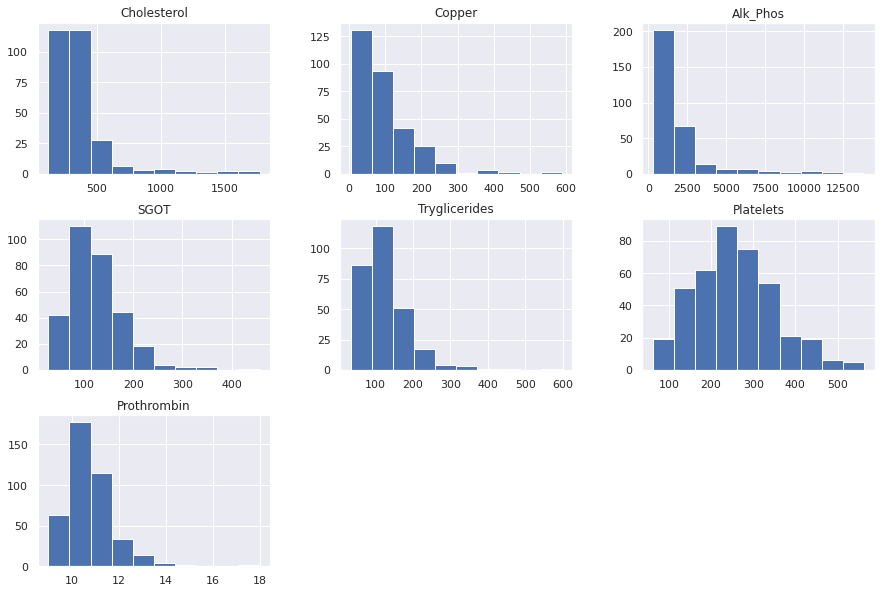

In [ ]:
# Melakukan pengecekkan distribusi data

df_null.hist(figsize=(15,10))

In [ ]:
numeric_df = df_null.select_dtypes(include=['float64'])
numeric_df.skew()

Cholesterol      3.408526
Copper           2.303640
Alk_Phos         2.992834
SGOT             1.449197
Tryglicerides    2.523902
Platelets        0.436568
Prothrombin      2.220274
dtype: float64

> Dapat diketahui dari data visualisasi dan pengecekan skewness bahwa semua kolom `numerik` yang memiliki missing value memiliki distribusi positive skewness. Sehingga untuk menanganinya, `missing values digantikan dengan median dari kolom`.

In [ ]:
num_null = ['Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides','Platelets','Prothrombin']
sirosis[num_null] = sirosis[num_null].fillna(sirosis[num_null].median())

> Untuk semua kolom `kategorikal` yang memiliki missing value, missing value ditangani dengan `menggantikan missing value dengan modus dari kolom`.

In [ ]:
cat_null = ['Ascites', 'Hepatomegaly', 'Spiders']
sirosis[cat_null] = sirosis[cat_null].fillna(sirosis[cat_null].mode().iloc[0])

In [ ]:
check_values(sirosis)

,kolom,dataType,null,nullPct,unique,values
0,Drug,object,0,0.0,3,"[D-penicillamine, Placebo, No Drug]"
1,Age,float64,0,0.0,235,"[58.8, 56.5, 70.1, 54.8, 38.1, 66.3, 55.6, 53...."
2,Sex,object,0,0.0,2,"[F, M]"
3,Ascites,object,0,0.0,2,"[Y, N]"
4,Hepatomegaly,object,0,0.0,2,"[Y, N]"
5,Spiders,object,0,0.0,2,"[Y, N]"
6,Edema,object,0,0.0,3,"[Y, N, S]"
7,Bilirubin,float64,0,0.0,98,"[14.5, 1.1, 1.4, 1.8, 3.4, 0.8, 1.0, 0.3, 3.2,..."
8,Cholesterol,float64,0,0.0,202,"[261.0, 302.0, 176.0, 244.0, 279.0, 248.0, 322..."
9,Albumin,float64,0,0.0,153,"[2.6, 4.14, 3.48, 2.54, 3.53, 3.98, 4.09, 4.0,..."


> Dilakukan pengecekan kembali, dapat dilihat missing values telah ditangani


**Handle Duplikasi Data jika ada**

In [ ]:
print("Jumlah duplikasi data : " + str(sirosis.duplicated().sum()))

Jumlah duplikasi data : 0


> Tidak ada duplikasi data sehingga tidak ada yang perlu ditangani

In [ ]:
# mencari quartile 
Q3 = sirosis.quantile(0.75)
Q1 = sirosis.quantile(0.25)
IQR = Q3-Q1

**Handle Outliera**

In [ ]:
# menampilkan jumlah outlier

Jumlah_Outlier = []

for col in sirosis.select_dtypes(np.number).columns:
    outliers = ((sirosis[col] < (Q1[col] - 1.5 * IQR[col])) | (sirosis[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    Jumlah_Outlier.append([col, outliers, outliers/len(sirosis)*100])
    
indexOutput = list(range(0, len(Jumlah_Outlier)))

pd.DataFrame(Jumlah_Outlier, columns=['Column', 'Outlier','persentase'],index=indexOutput).sort_values(by=['persentase'], ascending = False,ignore_index=True)

,Column,Outlier,persentase
0,Bilirubin,46,11.165049
1,Cholesterol,45,10.922330
2,Alk_Phos,44,10.679612
3,Copper,43,10.436893
4,Tryglicerides,40,9.708738
5,SGOT,23,5.582524
6,Prothrombin,18,4.368932
7,Albumin,9,2.184466
8,Platelets,5,1.213592
9,Age,0,0.000000


Jika dilihat, jumlah outlier tiap atribut relatif cukup kecil karena masih berada di rentang 0-15%

<ipython-input-71-03b8dce02245>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sirosis.select_dtypes(np.float).boxplot(vert=False,figsize=(30,30))


<Axes: >

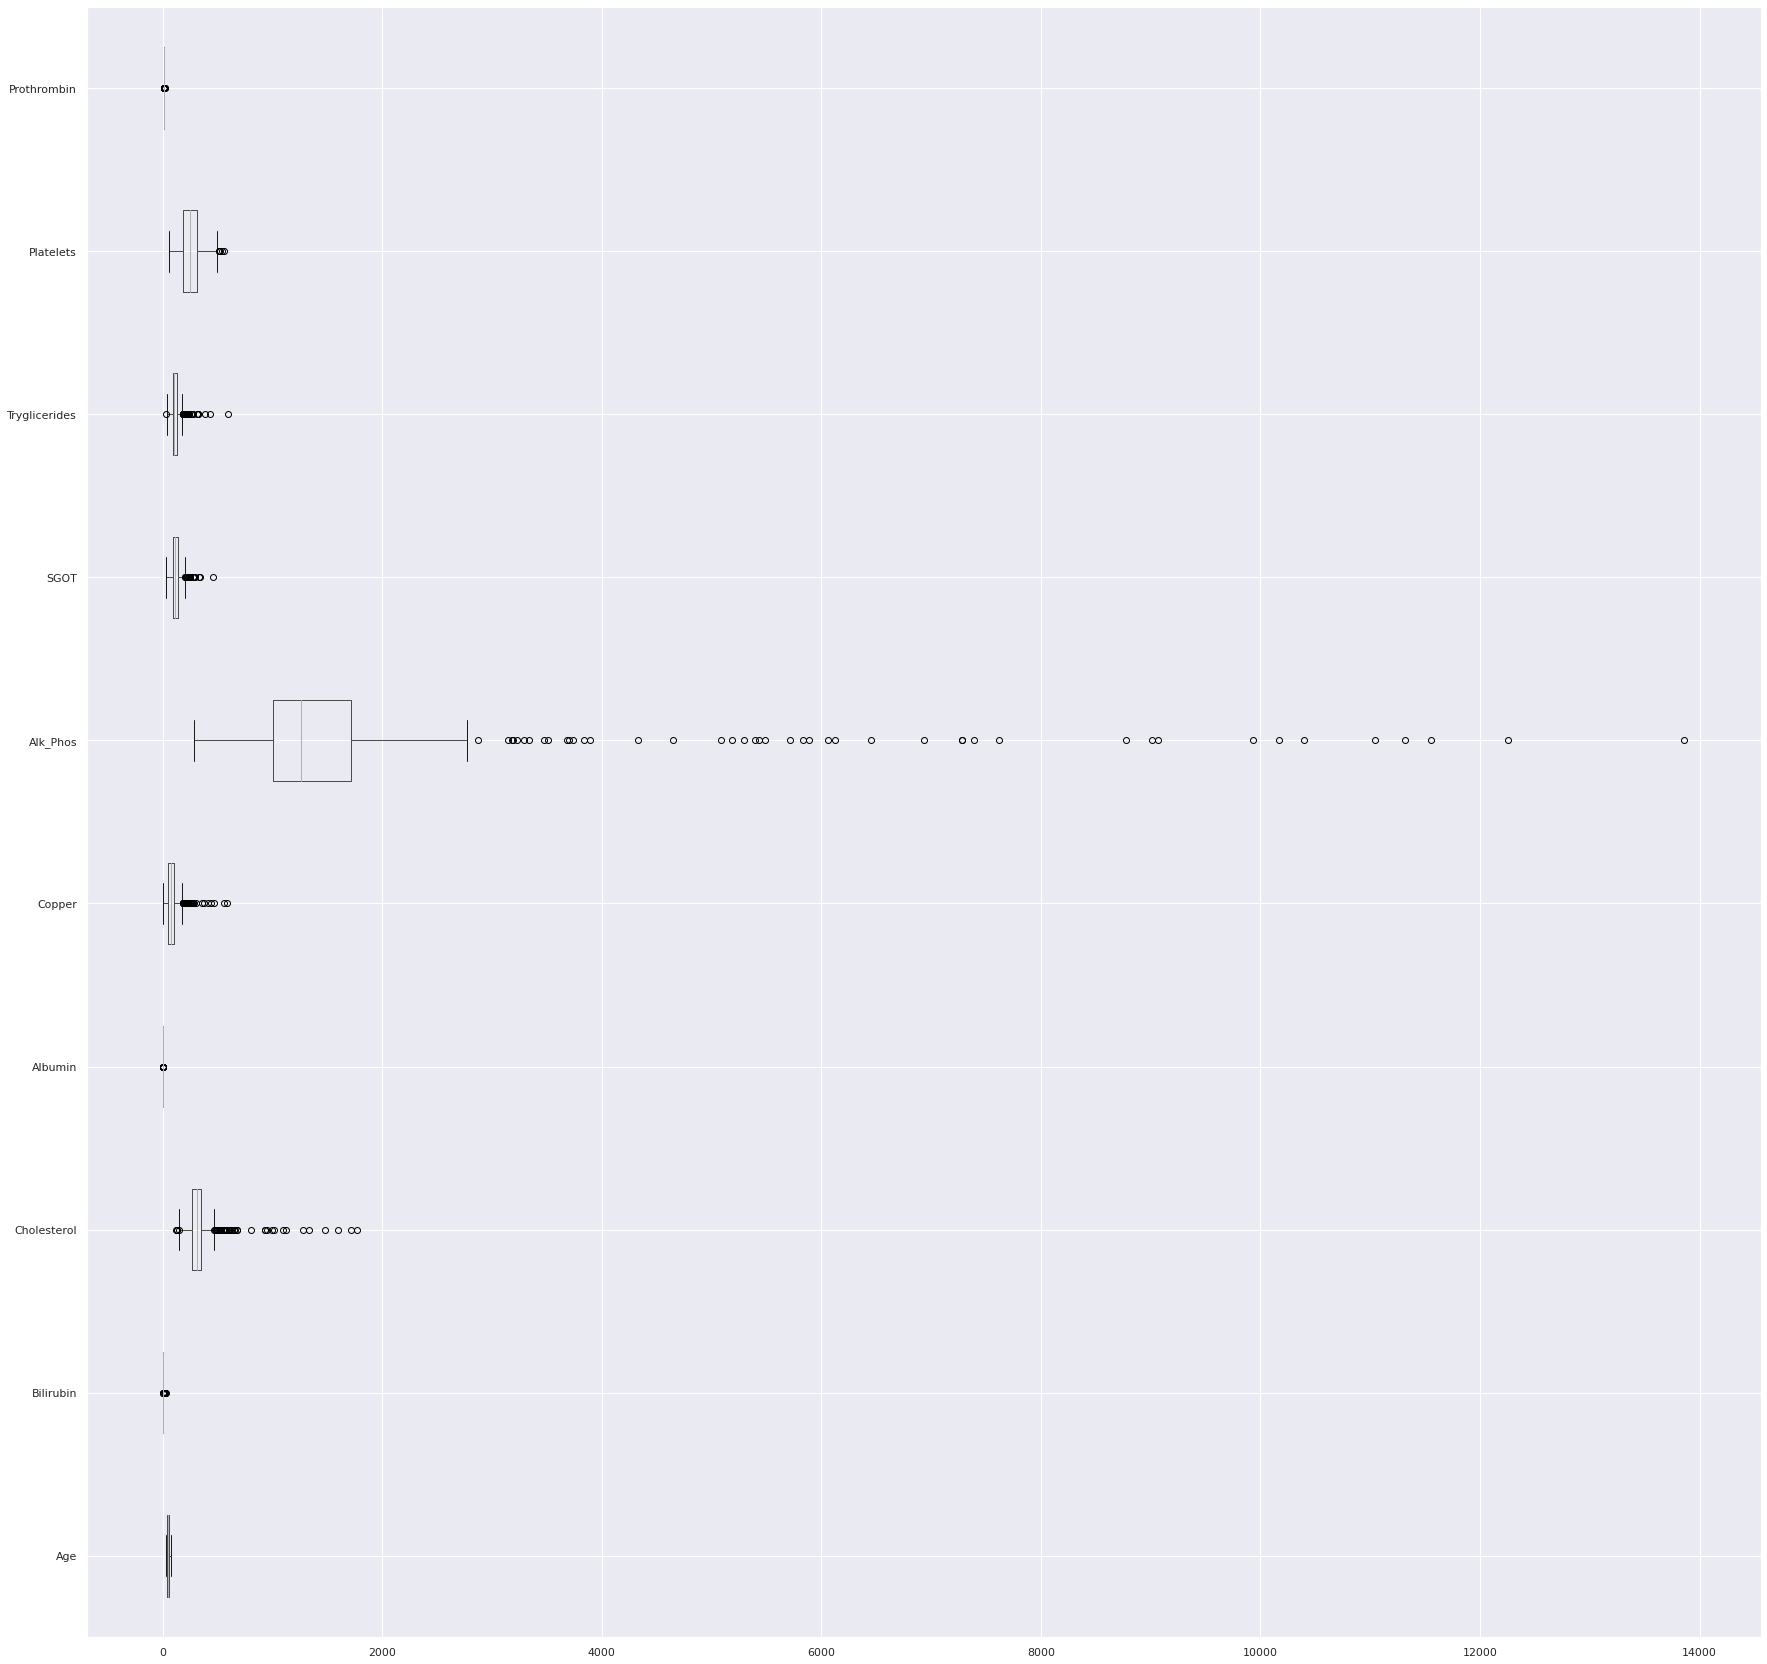

In [ ]:
sirosis.select_dtypes(np.float).boxplot(vert=False,figsize=(30,30))

In [ ]:
abnormal = sirosis[[
    'Bilirubin',
    'Cholesterol',
    'Copper',
    'Alk_Phos',
    'SGOT',
    'Tryglicerides',
    'Platelets',
    'Albumin',
    'Prothrombin']]

Dapat dilihat bahwa data yang memiliki outlier adalah 
    'Bilirubin',
    'Cholesterol',
    'Copper',
    'Alk_Phos',
    'SGOT',
    'Tryglicerides',
    'Platelets',
    'Albumin', dan
    'Prothrombin'

Data tersebut ditangani dengan menghapus data yang lebih dari 0.99% quantile karena data yang memiliki outlier tersebut memiliki nilai yang tidak normal pada maksimum data nya

In [ ]:
maximum = abnormal.quantile(0.99)
maximum

Bilirubin           21.4240
Cholesterol       1329.4000
Copper             408.4800
Alk_Phos         10975.1220
SGOT               287.1805
Tryglicerides      318.8900
Platelets          511.6900
Albumin              4.3800
Prothrombin         13.7780
Name: 0.99, dtype: float64

In [ ]:
sirosis_no_outlier = sirosis.copy()

for col in abnormal.columns:
    sirosis_no_outlier = sirosis_no_outlier[sirosis_no_outlier[col]<maximum[col]]

In [ ]:
sirosis_no_outlier.shape

(371, 17)

In [ ]:
cleaned =  sirosis_no_outlier.copy()

### 2. Persiapan Training [15]

Pada tahap ini, teman-teman diminta melakukan persiapan sebelum melakukan training. Berikut adalah hal-hal minimum yang harus teman-teman lakukan :
* `Lakukan encoding terhadap fitur-fitur yang masih dalam bentuk kategorikal`. Teman-teman dapat melakukan encoding dengan menggunakan library encoder apapun yang menurut teman-teman terbaik.

* `memilih dependent dan juga independent variables` teman-teman diminta untuk memilih dependent dan independent variables yang terbaik menurut penemuan teman-teman. Kalian bisa melakukan feature selection dengan ukuran terbaik menurut teman-teman. Kalin juga bisa menggunakan teknik lain, seperti mengecek korelasi atau melakukan literasi terkait penyakit Sirosis. Bagian terpenting adalah, teman-teman <b> wajib </b> menjelaskan asumsi yang teman-teman ambil. ( <i> Hint </i> : jangan ambil fitur yang terlalu banyak ya teman-teman :D mulai dari kecil-kecil terlebih dahulu, baru jika ingin diimprovisasi perbesar sendiri perlahan dan perlahan)


* `membagi dataset menjadi training dan testing` bagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing. Pastikan juga pembagian training dan testing <b>merata</b> berdasarkan target atribut (<i>Hint</i> : perhatikan parameter yang digunakan pada train split test yang digunakan sebelumnya).


* `lakukan standarisasi` teman-teman bebas memilih standarisasi apa yang menurut teman-teman merupakan strategi terbaik. Bagian terpenting adalah, berikan alasan kenapa teman-teman menggunakan strategi tersebut. (<i>Hint</i> : perhatikan method yang digunakan saat standarisasi, jangan sampai keliru ketika melakukan standarisasi training dan testing).

Note: Anda dapat menambahkan blok code maupun markdown sesuai dengan kebutuhan Anda.

**Encoding fitur yang kategorikal**

In [ ]:
le = LabelEncoder()

cleaned["Drug"] = le.fit_transform(cleaned["Drug"])
cleaned["Sex"] = le.fit_transform(cleaned["Sex"])
cleaned["Ascites"] = le.fit_transform(cleaned["Ascites"])
cleaned["Hepatomegaly"] = le.fit_transform(cleaned["Hepatomegaly"])
cleaned["Spiders"] = le.fit_transform(cleaned["Spiders"])
cleaned["Edema"] = le.fit_transform(cleaned["Edema"])

cleaned.head()

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,58.8,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,1
1,0,56.5,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,0
2,0,70.1,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,1
3,0,54.8,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,1
4,2,38.1,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,0


**Memilih dependent dan independent variabel**

In [ ]:
X_raw = cleaned.drop(["Stage"],axis=1) # Variabel independen
y = cleaned["Stage"] # Variabel dependen

In [ ]:
selector = SelectKBest(f_classif, k=2) 
X = selector.fit_transform(X_raw, y)

In [ ]:
input_features = selector.feature_names_in_
selector.get_feature_names_out(input_features=input_features)

array(['Hepatomegaly', 'Prothrombin'], dtype=object)

Dipilih 2 variabel independen terbaik, yaitu Hepatomegaly dan Prothrombin dengan menggunakan SelectKBest dengan k=2. K didapatkan 2 berdasarkan hasil uji coba satu per satu dengan melihat hasil evaluasi model, dan angka 2 adalah nilai yang paling terbaik.

**Membagi dataset menjadi training dan testing**

Data dibagi menjadi 20% testing dan 80% training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y,random_state = 123)

**Melakukan standarisasi**

Menggunakan Standard Scaler karena ingin memperkecil jarak antar unit, akan tetapi tetap memperhatikan standar deviasi dari data.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train) # training
X_test_scaled = scaler.transform(X_test) # testing

### 3. Implementasi Naive Bayes [25]

Pada tahapan ini, mahasiswa diminta untuk membangun model naive bayes dengan <b> syarat </b> memilih model naive bayes yang sesuai (**berikan alasan yang sesuai**). Teman-teman **boleh** melakukan parameter tuning untuk memaksimalkan model naive bayes. Kemudian, lakukan cross validation serta tampilkan rata-rata hasil evaluasi cross validationnya. Teman-teman dapat menggunakan algoritma cross_validation yang sesuai menurut teman-teman sekalian. Beberapa yang dapat digunakan misalnya `KFold` atau `StratifiedKFold`, teman-teman dapat melakukan eksplorasi lebih lanjut untuk mengetahui perbedaan keduanya. Kemudian jangan lupa mencantumkan hasil evaluasi cross validationnya. Tampilkan juga hasil evaluasi model dan berikan analisis teman-teman terkait hasil evaluasi model. Berikan saran perbaikan yang sesuai menurut pendapat teman-teman jika ternyata model yang diperoleh tidak optimal. 

**Catatan**: Ingat bahwa model kita ingin memprediksi apakah pasien sirosis atau tidak. Oleh karena itu, usahakan pilih model dengan hasil evaluasi yang meminimalkan jumlah False Negative (serta False Positive). Selain itu, usahakan untuk mengaitkan analisis hasil evaluasi model teman-teman dengan metrik evaluasi tersebut.

<b><i> Hint </i></b> : <br>
Liat distribusi nilai dari setiap feature yang telah teman-teman pilih pada tahap sebelumnya, apakah sifat distribusinya? Melalui analisis ini, teman-teman bisa menentukan model apa yang optimal.

Ingat yaa, biasakan menggunakan cell dengan tipe markdown untuk memberikan komentar atau catatan :D

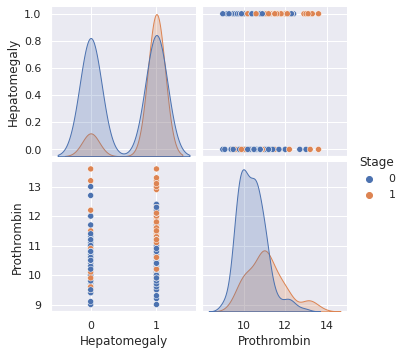

In [ ]:
# JAWABAN

distrib = cleaned[['Hepatomegaly', 'Prothrombin', 'Stage']]
sns.pairplot(distrib, hue ='Stage')  

Karena fitur yang digunakan terdapat fitur kategorikal, dapat dilihat bahwa data terdistribusi secara kategorikal sehingga akan lebih tepat jika menggunakan CategoricalNB. 

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=2, shuffle=True, random_state=42)

In [ ]:
from sklearn.naive_bayes import CategoricalNB

modelnb = CategoricalNB() # model naive bayes

modelnb.fit(X_train, y_train)

CategoricalNB()

In [ ]:
scores = cross_val_score(modelnb, X_train, y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation:{scores.mean()}')

Hasil Evaluasi cross validation:0.7635135135135135


Dapat dilihat bahwa model memiliki hasil evaluasi sebesar 0.76 yang berarti sudah cukup akurat untuk digunakan dalam prediksi. Hasil tersebut mungkin akan lebih akurat jika data preparation dilaksanakan dengan lebih baik.

In [ ]:
y_pred = modelnb.predict(X_test)

In [ ]:
evaluate_classifier_performance(y_pred,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        49
           1       0.73      0.62      0.67        26

    accuracy                           0.79        75
   macro avg       0.77      0.75      0.75        75
weighted avg       0.78      0.79      0.78        75



Confusion Matrix



prediction,0,1
actual,,
0,43,6
1,10,16




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.7866666666666666
F1 Macro Average: 0.7549019607843137
F1 Micro Average: 0.7866666666666666
Precision Macro Average: 0.7692967409948542
Precision Micro Average: 0.7866666666666666
Recall Macro Average: 0.7464678178963893
Recall Micro Average: 0.7866666666666666



Didapatkan hasil evaluasi sebesar 0.78, hasil sudah cukup baik untuk mempredisksi sitosis, tetapi masih ada 10 dari total prediksi yang menghasilkan false positive sehingga artinya model masih dapat diperbaiki mungkin dapat digunakan algoritma lain atau memaksimalkan data preparation

### 4. Implementasi KNN [30]

Setelah mencoba model naive bayes, teman-teman diminta juga untuk mencoba membangun model klasifikasi dengan algoritma KNN. Pilih nilai K yang terbaik menurut teman-teman dan lakukan analisis berdasarkan temukan teman-teman. Mulai dengan mengambil nilai K secara random terlebih dahulu pada percobaan pertama, lalu kemudian perbaiki dengan parameter tuning. Teman-teman juga boleh mencoba untuk tuning parameter yang lain (tetapi tidak diwajibkan). Lakukan cross validation serta tampilkan rata-rata hasil evaluasi cross validationnya. Teman-teman dapat menggunakan algoritma cross_validation yang sesuai menurut teman-teman sekalian. Beberapa yang dapat digunakan misalnya `KFold` atau `StratifiedKFold`, teman-teman dapat melakukan eksplorasi lebih lanjut untuk mengetahui perbedaan keduanya. Kemudian jangan lupa mencantumkan hasil evaluasi cross validationnya. Setelah itu, Berikan pula hasil evaluasi model dan berikan analisis teman-teman. Jika model kurang optimal, berikan saran perbaikan yang sesuai. Pilih juga parameter `metric` distance yang sesuai menurut teman-teman sesuai dengan karakteristik data yang diberikan.

**Catatan**: Ingat bahwa model kita ingin memprediksi apakah pasien sirosis atau tidak. Oleh karena itu, usahakan pilih model dengan hasil evaluasi yang meminimalkan jumlah False Negative (serta False Positive). Selain itu, usahakan untuk mengaitkan analisis hasil evaluasi model teman-teman dengan metrik evaluasi tersebut.

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=2) # kita akan menggunakan nilai 2 untuk k terlebih dahulu
KNN.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
scores = cross_val_score(KNN, X_train_scaled, y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.6554054054054055


In [ ]:
KNN_jaccard = KNeighborsClassifier(n_neighbors=2, metric='jaccard') # kita akan menggunakan nilai 2 untuk k terlebih dahulu
KNN_jaccard.fit(X_train_scaled,y_train)

KNeighborsClassifier(metric='jaccard', n_neighbors=2)

In [ ]:
scores = cross_val_score(KNN_jaccard, X_train_scaled, y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.6486486486486487


In [ ]:
KNN_manhattan = KNeighborsClassifier(n_neighbors=2, metric='manhattan') # kita akan menggunakan nilai 2 untuk k terlebih dahulu
KNN_manhattan.fit(X_train_scaled,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=2)

In [ ]:
scores = cross_val_score(KNN_manhattan, X_train_scaled, y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.6554054054054055


In [ ]:
# import KNN
from sklearn.neighbors import KNeighborsClassifier
KNN_euclidean = KNeighborsClassifier(n_neighbors=2, metric='euclidean') # kita akan menggunakan nilai 2 untuk k terlebih dahulu


In [ ]:
scores = cross_val_score(KNN_euclidean, X_train_scaled, y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.6554054054054055


Berdasarkan hasil evaluasi cross validation di atas, saya menggunakan metric minkowski karena tidak berbeda dengan yang lain dan lebih baik dibangingkan Jacard.

In [ ]:
y_pred = KNN.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
evaluate_classifier_performance(y_pred,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.76      0.92      0.83        49
           1       0.75      0.46      0.57        26

    accuracy                           0.76        75
   macro avg       0.76      0.69      0.70        75
weighted avg       0.76      0.76      0.74        75



Confusion Matrix



prediction,0,1
actual,,
0,45,4
1,14,12




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.76
F1 Macro Average: 0.7023809523809523
F1 Micro Average: 0.76
Precision Macro Average: 0.7563559322033898
Precision Micro Average: 0.76
Recall Macro Average: 0.6899529042386185
Recall Micro Average: 0.76



In [ ]:
# Optimalisasi KNN dengan gridsearch CV

# import Grid Search CV
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()

# parameter yang akan di tunning
tunned_params = [
  { 
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10]
  } 
]

print("##### Tuning hyper-parameters model KNN #####")
print()

clfKNN = GridSearchCV(model, 
                    tunned_params,
                     scoring="accuracy",
                    cv=5,
                   verbose = 2
                    )

clfKNN.fit(X_train_scaled, y_train)

print("Best parameters set found on development set:")
print()
print(clfKNN.best_params_)
print()
print("Detailed classification report:")
print()
y_true, y_pred = y_test, clfKNN.predict(X_test_scaled)
evaluate_classifier_performance(y_pred, y_true)
print()

##### Tuning hyper-parameters model KNN #####

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[

prediction,0,1
actual,,
0,41,8
1,10,16




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.76
F1 Macro Average: 0.73
F1 Micro Average: 0.76
Precision Macro Average: 0.7352941176470589
Precision Micro Average: 0.76
Recall Macro Average: 0.7260596546310832
Recall Micro Average: 0.76




Dihasilkan nilai prediksi yang cukup akurat. Mungkin akan lebih baik apabila data preparation dapat dilakukan lebih maksimal terurama dalam penanganan outlier karena KNN sensitif terhadap outlier atau jarak dari titik poin. Untuk false positive juga sudah cukup kecil, tetapi masih ada kemungkinan untuk adanya salah prediksi.

# ----Selesai----